In [2]:
import pandas as pd

In [14]:
data = pd.read_csv('201609-citibike-tripdata.csv')
data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,975,9/1/2016 00:00:02,9/1/2016 00:16:18,312,Allen St & Stanton St,40.722055,-73.989111,313,Washington Ave & Park Ave,40.696102,-73.967510,22609,Subscriber,1985.0,1
1,1220,9/1/2016 00:00:04,9/1/2016 00:20:25,316,Fulton St & William St,40.709560,-74.006536,239,Willoughby St & Fleet St,40.691966,-73.981302,16966,Subscriber,1977.0,2
2,308,9/1/2016 00:00:19,9/1/2016 00:05:27,479,9 Ave & W 45 St,40.760193,-73.991255,448,W 37 St & 10 Ave,40.756604,-73.997901,25601,Subscriber,1983.0,1
3,250,9/1/2016 00:00:25,9/1/2016 00:04:35,297,E 15 St & 3 Ave,40.734232,-73.986923,487,E 20 St & FDR Drive,40.733143,-73.975739,22094,Subscriber,1953.0,1
4,439,9/1/2016 00:00:25,9/1/2016 00:07:45,494,W 26 St & 8 Ave,40.747348,-73.997236,533,Broadway & W 39 St,40.752996,-73.987216,16319,Subscriber,1985.0,1


In [5]:
data1 = pd.read_csv('BikeStationBuffer')
data1.head()

,StationID,OBJECTID,tripduration,latitude,longitude
0,79,1,849.057723,40.719116,-74.006667
1,83,2,870.590206,40.683826,-73.976323
2,116,3,691.854660,40.741776,-74.001497
3,120,4,1036.931034,40.686768,-73.959282
4,128,5,821.978861,40.727103,-74.002971


In [16]:
data2 = data.groupby(['start station id']).count()
data2.head()

,tripduration,starttime,stoptime,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
start station id,,,,,,,,,,,,,,
72,3856,3856,3856,3856,3856,3856,3856,3856,3856,3856,3856,3856,3257,3856
79,3076,3076,3076,3076,3076,3076,3076,3076,3076,3076,3076,3076,2718,3076
82,1277,1277,1277,1277,1277,1277,1277,1277,1277,1277,1277,1277,1027,1277
83,1696,1696,1696,1696,1696,1696,1696,1696,1696,1696,1696,1696,1390,1696
116,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,4859,5174


In [108]:
len(data2)

616

In [35]:
len(data1)

382

In [36]:
Buffer = data2.loc[data1.StationID]
Buffer.head()

,tripduration,starttime,stoptime,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
start station id,,,,,,,,,,,,,,
79,3076.0,3076.0,3076.0,3076.0,3076.0,3076.0,3076.0,3076.0,3076.0,3076.0,3076.0,3076.0,2718.0,3076.0
83,1696.0,1696.0,1696.0,1696.0,1696.0,1696.0,1696.0,1696.0,1696.0,1696.0,1696.0,1696.0,1390.0,1696.0
116,5174.0,5174.0,5174.0,5174.0,5174.0,5174.0,5174.0,5174.0,5174.0,5174.0,5174.0,5174.0,4859.0,5174.0
120,672.0,672.0,672.0,672.0,672.0,672.0,672.0,672.0,672.0,672.0,672.0,672.0,607.0,672.0
128,6952.0,6952.0,6952.0,6952.0,6952.0,6952.0,6952.0,6952.0,6952.0,6952.0,6952.0,6952.0,6352.0,6952.0


In [37]:
Buffer.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station name',
       u'start station latitude', u'start station longitude',
       u'end station id', u'end station name', u'end station latitude',
       u'end station longitude', u'bikeid', u'usertype', u'birth year',
       u'gender'],
      dtype='object')

In [38]:
Buffer.drop(['starttime','stoptime','start station name','start station latitude', 'start station longitude', 
             'end station id','end station name','end station latitude','end station longitude','bikeid',
            'usertype','birth year','gender'], axis=1, inplace=True)

In [53]:
Buffer.rename(columns={'tripduration':'ridership'},inplace=True)

In [43]:
data3 = data.groupby(['end station id']).count()
data3.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
end station id,,,,,,,,,,,,,,
72,3866,3866,3866,3866,3866,3866,3866,3866,3866,3866,3866,3866,3276,3866
79,3101,3101,3101,3101,3101,3101,3101,3101,3101,3101,3101,3101,2770,3101
82,1288,1288,1288,1288,1288,1288,1288,1288,1288,1288,1288,1288,1008,1288
83,1552,1552,1552,1552,1552,1552,1552,1552,1552,1552,1552,1552,1245,1552
116,5236,5236,5236,5236,5236,5236,5236,5236,5236,5236,5236,5236,4952,5236


In [88]:
Nbuffer = data2.loc[-data2.index.isin(data1.StationID)]
Nbuffer.head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  if __name__ == '__main__':


,tripduration,starttime,stoptime,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
start station id,,,,,,,,,,,,,,
72,3856,3856,3856,3856,3856,3856,3856,3856,3856,3856,3856,3856,3257,3856
82,1277,1277,1277,1277,1277,1277,1277,1277,1277,1277,1277,1277,1027,1277
119,289,289,289,289,289,289,289,289,289,289,289,289,250,289
127,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6355,6865
144,944,944,944,944,944,944,944,944,944,944,944,944,518,944


In [91]:
Nbuffer.drop(['starttime','stoptime','start station name','start station latitude', 'start station longitude', 
             'end station id','end station name','end station latitude','end station longitude','bikeid',
            'usertype','birth year','gender'], axis=1, inplace=True)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [92]:
Nbuffer.rename(columns={'tripduration':'ridership'},inplace=True)

//anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [99]:
Buffer.mean()

ridership    2979.572178
dtype: float64

In [100]:
Nbuffer.mean()

ridership    2185.697872
dtype: float64

In [97]:
len(Buffer)

382

In [98]:
len(Nbuffer)

235

In [105]:
data1.head()

,StationID,OBJECTID,tripduration,latitude,longitude
0,79,1,849.057723,40.719116,-74.006667
1,83,2,870.590206,40.683826,-73.976323
2,116,3,691.854660,40.741776,-74.001497
3,120,4,1036.931034,40.686768,-73.959282
4,128,5,821.978861,40.727103,-74.002971


In [95]:
Buffer.head()

,ridership
start station id,
79,3076.0
83,1696.0
116,5174.0
120,672.0
128,6952.0


In [96]:
Nbuffer.head()

,ridership
start station id,
72,3856
82,1277
119,289
127,6865
144,944


In [80]:
# another way to select by index value
data2.loc[data2.index.isin(data1.StationID)]

,tripduration,starttime,stoptime,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
start station id,,,,,,,,,,,,,,
79,3076,3076,3076,3076,3076,3076,3076,3076,3076,3076,3076,3076,2718,3076
83,1696,1696,1696,1696,1696,1696,1696,1696,1696,1696,1696,1696,1390,1696
116,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,4859,5174
120,672,672,672,672,672,672,672,672,672,672,672,672,607,672
128,6952,6952,6952,6952,6952,6952,6952,6952,6952,6952,6952,6952,6352,6952
137,2727,2727,2727,2727,2727,2727,2727,2727,2727,2727,2727,2727,2384,2727
143,2062,2062,2062,2062,2062,2062,2062,2062,2062,2062,2062,2062,1891,2062
146,2894,2894,2894,2894,2894,2894,2894,2894,2894,2894,2894,2894,2600,2894
147,5175,5175,5175,5175,5175,5175,5175,5175,5175,5175,5175,5175,4708,5175


In [106]:
station_population = pd.read_csv('Station_Population.txt')
station_population.head()

,FID,OBJECTID,StationID,tripdurati,latitude,longitude,FID_1,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area,all_househ,child_per_,Borough_Co,Total_Popu
0,0,139,447,913.936277,40.763707,-73.985162,13,1,Manhattan,61,MN15,Clinton,35037.171581,1.838138e+07,2545.0,424.166667,61,45884.0
1,1,140,449,843.960385,40.764618,-73.987895,13,1,Manhattan,61,MN15,Clinton,35037.171581,1.838138e+07,2545.0,424.166667,61,45884.0
2,2,141,450,791.922473,40.762272,-73.987882,13,1,Manhattan,61,MN15,Clinton,35037.171581,1.838138e+07,2545.0,424.166667,61,45884.0
3,3,157,479,837.528228,40.760193,-73.991255,13,1,Manhattan,61,MN15,Clinton,35037.171581,1.838138e+07,2545.0,424.166667,61,45884.0
4,4,163,488,840.844720,40.756458,-73.993722,13,1,Manhattan,61,MN15,Clinton,35037.171581,1.838138e+07,2545.0,424.166667,61,45884.0


In [107]:
len(station_population)

382

In [112]:
population = Buffer.join(station_population)
population.head()

,ridership,FID,OBJECTID,StationID,tripdurati,latitude,longitude,FID_1,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area,all_househ,child_per_,Borough_Co,Total_Popu
start station id,,,,,,,,,,,,,,,,,,,
79,3076.0,79.0,249.0,3115.0,1006.247245,40.732322,-73.955086,40.0,3.0,Brooklyn,47.0,BK76,Greenpoint,29112.577735,3.533883e+07,2635.0,292.777778,47.0,34719.0
83,1696.0,83.0,220.0,3070.0,810.690583,40.705109,-73.944073,70.0,3.0,Brooklyn,47.0,BK90,East Williamsburg,49171.276360,3.913986e+07,3184.0,636.800000,47.0,34158.0
116,5174.0,116.0,292.0,3235.0,745.887247,40.752165,-73.979922,74.0,1.0,Manhattan,61.0,MN20,Murray Hill-Kips Bay,23135.103743,1.446596e+07,2794.0,698.500000,61.0,50742.0
120,672.0,120.0,214.0,3064.0,1513.698480,40.696820,-73.937569,75.0,3.0,Brooklyn,47.0,BK35,Stuyvesant Heights,28239.080767,3.140694e+07,11331.0,1030.090909,47.0,63504.0
128,6952.0,128.0,252.0,3121.0,1103.142395,40.745248,-73.947333,87.0,4.0,Queens,81.0,QN31,Hunters Point-Sunnyside-West Maspeth,74605.804357,1.023508e+08,6375.0,910.714286,81.0,63271.0


In [114]:
population.columns

Index([u'ridership', u'FID', u'OBJECTID', u'StationID', u'tripdurati',
       u'latitude', u'longitude', u'FID_1', u'BoroCode', u'BoroName',
       u'CountyFIPS', u'NTACode', u'NTAName', u'Shape_Leng', u'Shape_Area',
       u'all_househ', u'child_per_', u'Borough_Co', u'Total_Popu'],
      dtype='object')

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from pandas import DataFrame
%pylab inline
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


In [134]:
lm = smf.ols(formula='ridership ~ Total_Popu', data = population).fit()
print lm.summary()

                            OLS Regression Results                            
Dep. Variable:              ridership   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.1409
Date:                Mon, 12 Dec 2016   Prob (F-statistic):              0.708
Time:                        06:20:37   Log-Likelihood:                -911.13
No. Observations:                 100   AIC:                             1826.
Df Residuals:                      98   BIC:                             1831.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   3577.0121    425.346      8.410      0.0

In [145]:
y = population[['ridership','Total_Popu','all_househ','child_per_']]

In [151]:
len(y)

382

In [146]:
lm2 = smf.ols(formula = 'ridership ~ Total_Popu + all_househ + child_per_', data = population).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:              ridership   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.365
Date:                Mon, 12 Dec 2016   Prob (F-statistic):              0.258
Time:                        06:24:46   Log-Likelihood:                -909.11
No. Observations:                 100   AIC:                             1826.
Df Residuals:                      96   BIC:                             1837.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   3705.5972    435.416      8.510      0.0

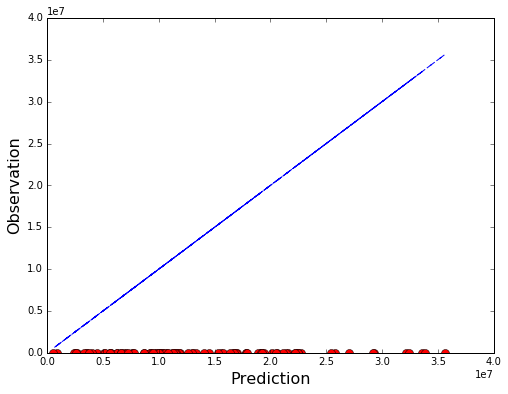

In [181]:
y_fit = lm2.predict(y,transform=False)  
plt.figure(figsize = (8,6))
plt.plot(y_fit,y.ridership,'or', markersize = 8) 
plt.plot(y_fit,y_fit,'--b', linewidth = 1)              

# Plot setting
plt.xlabel('Prediction', fontsize = 16)
plt.ylabel('Observation', fontsize = 16)
plt.savefig('OLS.png')

In [179]:
n = 100
train = y[:50]
valid = y[50:100]
Regress = smf.ols(formula = 'ridership ~ Total_Popu + all_househ + child_per_', data = train).fit()

# For displaying R^2 and linear model summary
def modelEval(lm, key = 'ridership'):
    lmy = lm.predict(valid,transform=False)
    y_err = lmy - valid[key]
    y_norm = valid[key]-mean(valid[key])
    R2 = 1-y_err.dot(y_err)/y_norm.dot(y_norm)  # R2 w.r.t. validation set
    print('Validation R^2 is %f'%R2)
    print(lm.summary())
    plt.plot(lmy, lmy, 'b-')
    plt.plot(lmy, valid[key],'or')

Validation R^2 is -37707279.982962
                            OLS Regression Results                            
Dep. Variable:              ridership   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     2.179
Date:                Mon, 12 Dec 2016   Prob (F-statistic):              0.103
Time:                        06:34:17   Log-Likelihood:                -456.41
No. Observations:                  50   AIC:                             920.8
Df Residuals:                      46   BIC:                             928.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   2951.

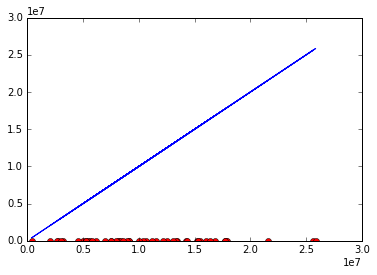

In [180]:
modelEval(Regress)